In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import citipy
from citipy import citipy
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(-86.36194406467324, -129.5053618513202),
 (35.96575705062226, 39.06272587439307),
 (-12.344391903697684, -150.5999337618935),
 (56.8638782756494, 166.26728332855316),
 (67.96258790811729, -66.08675453499725),
 (-35.10986016123665, -77.6982836147999),
 (85.71145220044784, 28.804042910462584),
 (-64.83617584276634, 37.81422224954261),
 (-81.69819597998352, 59.19492242764514),
 (-47.433707755940866, -1.5771287766307012),
 (35.887273080237776, -45.25345184227075),
 (-17.05315566520717, 150.63039550019374),
 (26.124370712972294, 48.89777319794595),
 (-51.913451830073484, -90.29985217030732),
 (-36.082886011929034, 24.34367793569328),
 (83.37809569998078, 36.93451110591164),
 (-19.17865422537045, 86.95963030993664),
 (-45.65801418335287, 28.647137152466684),
 (-45.57838452190063, 62.31711813830148),
 (57.80799103301297, 28.237102372450977),
 (-53.72092433523464, -3.3138889580274054),
 (41.107293377547705, 28.10538453485418),
 (49.80113611518567, -105.90993957199372),
 (-87.30909908320524, 

In [3]:
lat_lngs[0][1]

-129.5053618513202

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:
# Starting URL for Weather Map API Call.

url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}&units=imperial"

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | suruc
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | mehamn
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | bowen
Processing Record 13 of Set 1 | buqayq
City not found. Skipping...
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | pskov
Processing Record 21 of Set 1 | canta
Processing Record 22 of Set 1 | assiniboia
Processing Record 2

Processing Record 38 of Set 4 | patitirion
Processing Record 39 of Set 4 | saint stephen
Processing Record 40 of Set 4 | baglan
Processing Record 41 of Set 4 | inirida
Processing Record 42 of Set 4 | haverhill
Processing Record 43 of Set 4 | mata
Processing Record 44 of Set 4 | perth
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | dakar
Processing Record 48 of Set 4 | magdalena
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | amapa
Processing Record 1 of Set 5 | makakilo city
Processing Record 2 of Set 5 | grudziadz
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | namatanai
Processing Record 6 of Set 5 | star
Processing Record 7 of Set 5 | nouadhibou
Processing Record 8 of Set 5 | konitsa
Processing Record 9 of Set 5 | dalvik
Processing Record 10 of Set 5 | vestmannaeyjar
Processing Record 11 of Set 5 | shugurovo
Processing Record

Processing Record 23 of Set 8 | viransehir
Processing Record 24 of Set 8 | lavrentiya
Processing Record 25 of Set 8 | silifke
Processing Record 26 of Set 8 | amazar
Processing Record 27 of Set 8 | ornskoldsvik
Processing Record 28 of Set 8 | turbat
Processing Record 29 of Set 8 | riyadh
Processing Record 30 of Set 8 | sagauli
Processing Record 31 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 8 | tateyama
Processing Record 33 of Set 8 | huilong
Processing Record 34 of Set 8 | kijang
Processing Record 35 of Set 8 | darhan
Processing Record 36 of Set 8 | poenari
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | deep river
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | pangkalanbuun
Processing Record 44 of Set 8 | volginskiy
City not found. Skipping...
Processing Record 45 of Set 8 | mor

Processing Record 7 of Set 12 | sumbe
Processing Record 8 of Set 12 | san policarpo
Processing Record 9 of Set 12 | daro
Processing Record 10 of Set 12 | bikin
Processing Record 11 of Set 12 | high level
Processing Record 12 of Set 12 | kifri
Processing Record 13 of Set 12 | lugovskiy
City not found. Skipping...
Processing Record 14 of Set 12 | baculin
Processing Record 15 of Set 12 | camana
Processing Record 16 of Set 12 | kiruna
Processing Record 17 of Set 12 | lashio
Processing Record 18 of Set 12 | nokia
Processing Record 19 of Set 12 | moose factory
Processing Record 20 of Set 12 | asau
Processing Record 21 of Set 12 | puerto del rosario
Processing Record 22 of Set 12 | coquimbo
Processing Record 23 of Set 12 | sulangan
Processing Record 24 of Set 12 | muros
Processing Record 25 of Set 12 | cacapava do sul
Processing Record 26 of Set 12 | doha
Processing Record 27 of Set 12 | filadelfia
Processing Record 28 of Set 12 | guayaramerin
Processing Record 29 of Set 12 | ghanzi
Processin

In [7]:
len(city_data)

551

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.04,69,1,6.53,PF,2021-08-12 04:40:35
1,Suruc,36.9761,38.4250,80.80,37,21,7.36,TR,2021-08-12 04:40:35
2,Faanui,-16.4833,-151.7500,78.76,73,10,13.27,PF,2021-08-12 04:40:36
3,Nikolskoye,59.7035,30.7861,59.02,69,100,5.03,RU,2021-08-12 04:40:36
4,Pangnirtung,66.1451,-65.7125,47.66,67,100,11.45,CA,2021-08-12 04:40:37
5,Lebu,-37.6167,-73.6500,46.49,73,0,4.61,CL,2021-08-12 04:40:38
6,Mehamn,71.0357,27.8492,57.15,82,75,12.66,NO,2021-08-12 04:40:39
7,Port Alfred,-33.5906,26.8910,57.04,70,30,27.54,ZA,2021-08-12 04:40:39
8,East London,-33.0153,27.9116,54.54,71,0,11.50,ZA,2021-08-12 04:40:40
9,Cape Town,-33.9258,18.4232,49.87,89,40,4.00,ZA,2021-08-12 04:35:52


In [9]:
# Reorder the columns.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-08-12 04:40:35,-23.1203,-134.9692,73.04,69,1,6.53
1,Suruc,TR,2021-08-12 04:40:35,36.9761,38.4250,80.80,37,21,7.36
2,Faanui,PF,2021-08-12 04:40:36,-16.4833,-151.7500,78.76,73,10,13.27
3,Nikolskoye,RU,2021-08-12 04:40:36,59.7035,30.7861,59.02,69,100,5.03
4,Pangnirtung,CA,2021-08-12 04:40:37,66.1451,-65.7125,47.66,67,100,11.45


In [10]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

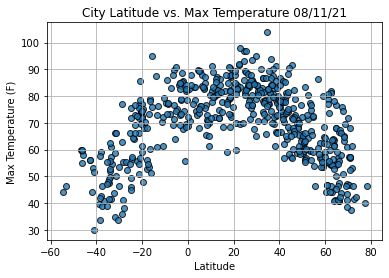

In [12]:
# Import time module.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

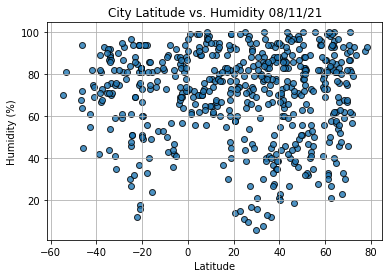

In [13]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

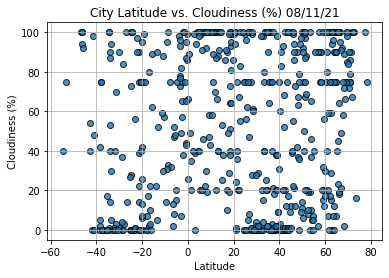

In [14]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

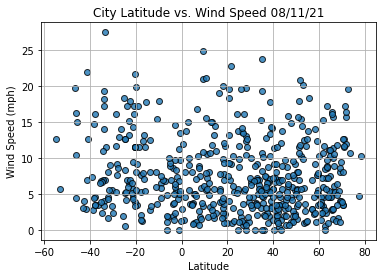

In [15]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [16]:
# Import linregress

from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

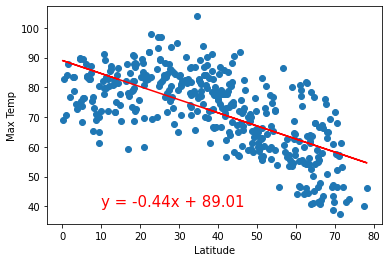

In [19]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature", "Max Temp", (10,40))



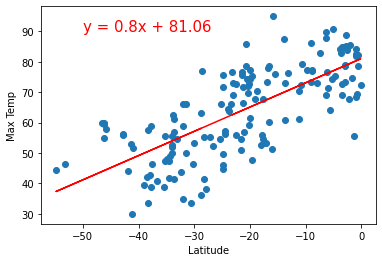

In [22]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


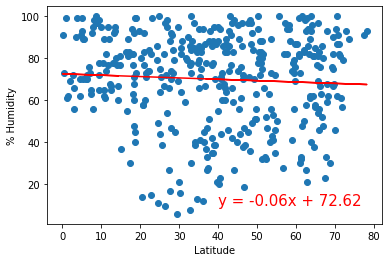

In [23]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

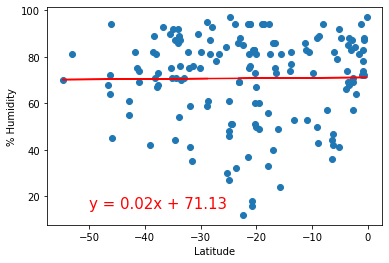

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

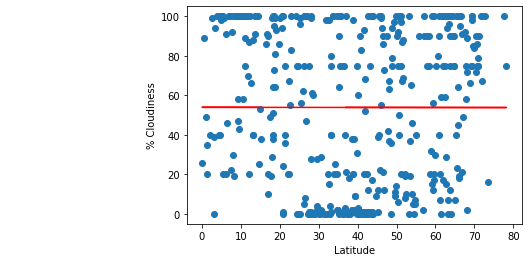

In [36]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

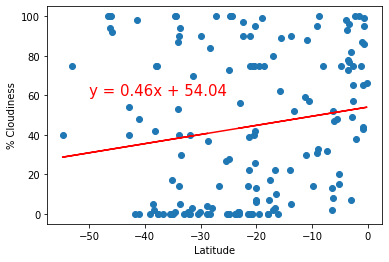

In [37]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

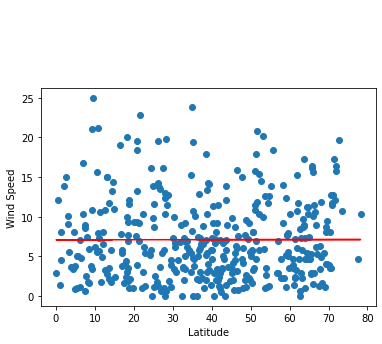

In [41]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))